Fbprophet is an open source project developed by Facebook, a forecasting tool available in both Python and R. It provides intuitive parameters which are easy to tune. Even someone who lacks deep expertise in time-series forecasting models can use this to generate meaningful predictions for a variety of problems in business scenarios.

In [24]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [25]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


<AxesSubplot:>

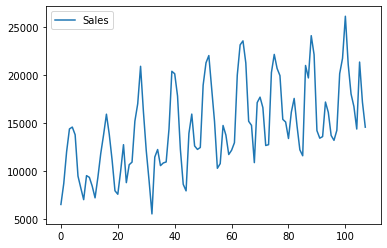

In [26]:
# Plotting the data
df.plot()

In Fbprophet, the DataFrame must have a specific format. The first column i.e date column must have the name `ds`. The second column must have the name `y` and contain the observations values.

In [27]:
df.columns = ["ds", "y"]
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [28]:
# Also converting date column to date format
df["ds"] = pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [29]:
# Initialize the model
model = Prophet()
# Fit the DataFrame
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
model.component_modes
# We can see it has taken yearly, and disabled weekly and daily seasonality

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [31]:
# Create future dates of 365 data
future_dates = model.make_future_dataframe(periods=365)
future_dates.tail()
# 365 days are appended here

,ds
468,1969-11-27
469,1969-11-28
470,1969-11-29
471,1969-11-30
472,1969-12-01


In [32]:
# Predict for future dates
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9608.114823,4490.185691,7761.452229,9608.114823,9608.114823,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,0.0,0.0,0.0,6147.751455
1,1960-02-01,9712.080426,5205.161880,8322.444052,9712.080426,9712.080426,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,0.0,0.0,0.0,6767.959603
2,1960-03-01,9809.338570,11289.257736,14331.844912,9809.338570,9809.338570,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,0.0,0.0,0.0,12749.983451
3,1960-04-01,9913.304173,13246.559046,16473.784500,9913.304173,9913.304173,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,0.0,0.0,0.0,14826.918115
4,1960-05-01,10013.916048,14601.400187,17879.912534,10013.916048,10013.916048,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,0.0,0.0,0.0,16180.443694


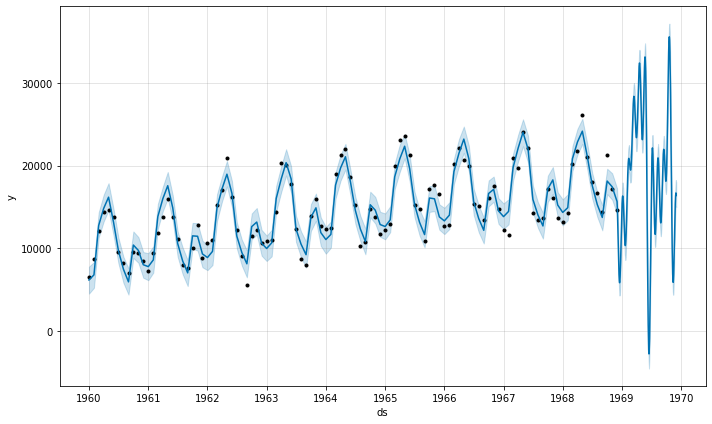

In [33]:
model.plot(pred);

Now we need to do cross validation

In [34]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1000 days', period='180 days', horizon='365 days')
# initial: The initial model will be trained on the first these number days of data
# period: We usually write half of horizon value; The model will then train on the initial + the period
# horizon: here we have written 365, so it will forecast for next 365 days


INFO:fbprophet:Making 11 forecasts with cutoffs between 1962-12-28 00:00:00 and 1967-12-02 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

Let's say horizon = 1000 days, period: 180 & horizon = 360

The initial model will be trained on the first 1000 days of data. It will forecast the next 360 days of data (because horizon is set to 360). The model will then train on the initial period + the period (1000 + 180 days in this case) and forecast the next 360 days. It will continued like this, adding another 180 days to the training data and then forecasting for the next 360 until there is no longer enough data to do this.

In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
# It take y_pred andy value and finds values(shown below)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.613377e+06,1616.594194,1430.804772,0.115151,0.108456,0.384615
1,40 days,2.606291e+06,1614.401010,1415.773364,0.113641,0.108456,0.384615
2,42 days,2.979229e+06,1726.044367,1504.073490,0.124045,0.108456,0.384615
3,46 days,3.223397e+06,1795.382263,1593.724590,0.130697,0.114265,0.307692
4,47 days,3.472199e+06,1863.383792,1702.923068,0.138152,0.125212,0.230769
...,...,...,...,...,...,...,...
115,354 days,4.478236e+06,2116.184388,1751.558965,0.097836,0.095906,0.384615
116,356 days,3.285152e+06,1812.498920,1504.804086,0.085706,0.090098,0.461538
117,359 days,3.825282e+06,1955.832865,1620.497997,0.096088,0.095906,0.461538
118,362 days,3.712156e+06,1926.695564,1537.361087,0.092699,0.095906,0.461538


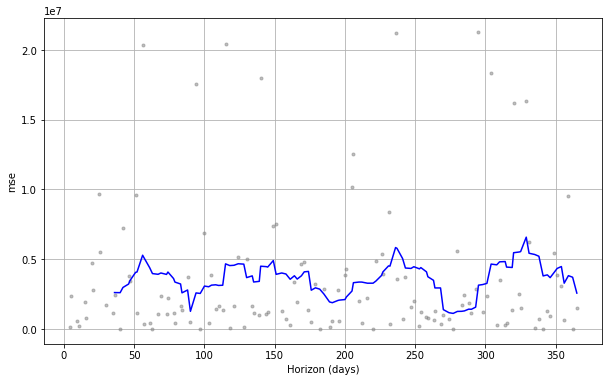

In [36]:
from fbprophet.plot import plot_cross_validation_metric
graph = plot_cross_validation_metric(df_cv, metric="mse")